In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#импорт библиотек

После импорта создаём табличку

In [497]:
ca = pd.read_csv('/home/user/sas/Nova-main/the_unlimited_power.csv')
ca.head(12)



,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


Так как уже заметны пропуски в данных, перепроверяем всё через хитмап, чтобы лучше увидеть проблему

In [498]:
ca.replace(-1, np.nan, inplace=True)

ca.head(12)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


<Axes: >

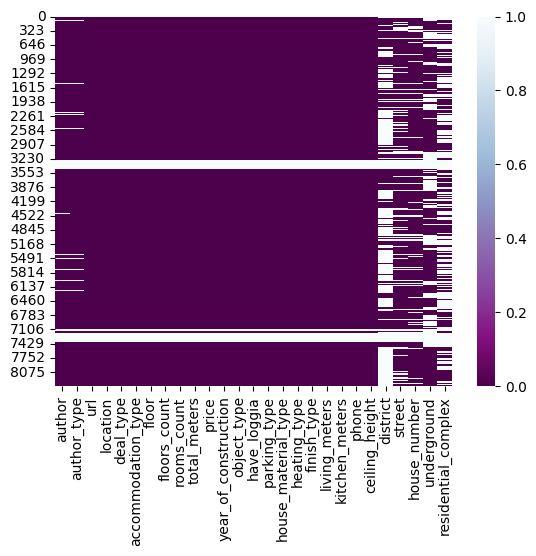

In [499]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

Дополнительно смотрим значения пропусков в процентах

In [500]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

total_counts = ca.shape[0]

null_counts_cian['Null Percentage'] = ((null_counts_cian['Null Count'] / total_counts) * 100).map('{:.2f}%'.format)

print(null_counts_cian)

                  Column  Null Count Null Percentage
0                 author         801           9.54%
1            author_type         798           9.51%
2                    url         487           5.80%
3               location         487           5.80%
4              deal_type         487           5.80%
5     accommodation_type         487           5.80%
6                  floor         487           5.80%
7           floors_count         487           5.80%
8            rooms_count         487           5.80%
9           total_meters         487           5.80%
10                 price         500           5.96%
11  year_of_construction         487           5.80%
12           object_type         487           5.80%
13           have_loggia         487           5.80%
14          parking_type         487           5.80%
15   house_material_type         487           5.80%
16          heating_type         487           5.80%
17           finish_type         487          

По меньшей мере 487 строк пусты, а так же огромной части данных не хватает. Нужно сразу избавиться от бесполезной информации, которая не нужна машине для обучения.
Так же убираем м² из данных, которые будут нужны нам позже

In [501]:
ca.drop(['deal_type', 'author_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'finish_type', 'house_material_type', 'ceiling_height', 'floors_count'], axis=1, inplace=True)

columns_to_convert = ['living_meters', 'kitchen_meters'] 


def clean_and_convert(value):
    if isinstance(value, str):

        value = re.sub(r'\s*м²|\s*м', '', value)  
    return pd.to_numeric(value, errors='coerce')  


for column in columns_to_convert:
    ca[column] = ca[column].apply(clean_and_convert)

ca.replace('-1', np.nan, inplace=True)

ca.head(8)

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex
0,Серпухов,6,1,20.7,2350000,1917,Вторичка,NaN,Наземная,18.0,1.0,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,1,33.0,4150000,1975,Вторичка,NaN,NaN,18.0,6.0,NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,-1.0,-1.0,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,-1.0,-1.0,Серпухов,Российская,NaN,NaN
4,Серпухов,4,1,25.9,3000000,2009,Вторичка,NaN,Наземная,20.0,5.0,Серпухов,Химиков,NaN,NaN
5,Серпухов,2,1,46.7,6599999,NaN,Вторичка,NaN,NaN,25.0,6.0,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,1,29.0,3350000,1917,Вторичка,NaN,Наземная,25.0,-1.0,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,1,19.1,3600000,1917,Вторичка,NaN,NaN,-1.0,-1.0,Серпухов,Крюкова,NaN,NaN


author, author_type, url, phone - не нужные для машины данные, они все уникальные и ей учитываться не должны. Поэтому убраны.

deal_type, accommodation_type, heating_type, finish_type, house_material_type, floors_count - одинаковые данные в нашем случае. Так как парсились квартиры, у них у всех эти значения одинаковые, поэтому от них нужно избавиться.

house_number, ceiling_height - не влияющие на цену данные. Путём ручных проверок на циане, а так же проверкой регламента у застройщиков, выяснилось: номер дома не влияет на цену от слова совсем; высота потолка всегда равна или больше 2,5 метров, из-за чего так же на цену не влияет.

In [502]:
ca.shape


(8393, 15)

Проверяем на дубликаты и тут же удаляем их

In [503]:
ca = ca.drop_duplicates()

ca.shape



(7207, 15)

Убрали дубликаты и посчитали количество строк со столбцов

In [504]:
ca.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   object 
 1   floor                 7206 non-null   object 
 2   rooms_count           7113 non-null   object 
 3   total_meters          7206 non-null   object 
 4   price                 7193 non-null   object 
 5   year_of_construction  5956 non-null   object 
 6   object_type           7206 non-null   object 
 7   have_loggia           4149 non-null   object 
 8   parking_type          4038 non-null   object 
 9   living_meters         4411 non-null   float64
 10  kitchen_meters        4531 non-null   float64
 11  district              2869 non-null   object 
 12  street                5715 non-null   object 
 13  underground           5003 non-null   object 
 14  residential_complex   3633 non-null   object 
dtypes: float64(2), object(13)


Делаем Хитмап и смотрим количество пропусков

<Axes: >

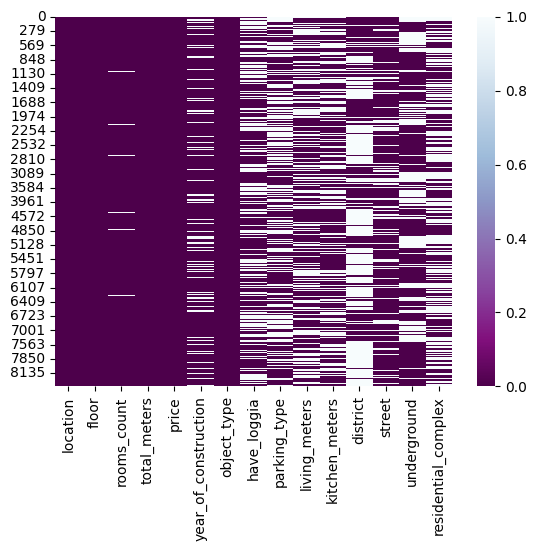

In [505]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')


Огромное количество пропусков, с которыми нужно что-то сделать

In [506]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

total_counts = ca.shape[0]

null_counts_cian['Null Percentage'] = ((null_counts_cian['Null Count'] / total_counts) * 100).map('{:.2f}%'.format)

print(null_counts_cian)

                  Column  Null Count Null Percentage
0               location           1           0.01%
1                  floor           1           0.01%
2            rooms_count          94           1.30%
3           total_meters           1           0.01%
4                  price          14           0.19%
5   year_of_construction        1251          17.36%
6            object_type           1           0.01%
7            have_loggia        3058          42.43%
8           parking_type        3169          43.97%
9          living_meters        2796          38.80%
10        kitchen_meters        2676          37.13%
11              district        4338          60.19%
12                street        1492          20.70%
13           underground        2204          30.58%
14   residential_complex        3574          49.59%


Относительно колонок district, street, parking_type, underground и have_loggia есть идеи.
Так как они сильно влияют на цену, их нельхя удалять. Поэтому заполняю их либо информацией друг друга, либо при помощи новых значений, такиъ, как "Нет"

In [507]:
ca['district'] = ca['district'].fillna(ca['location'])
ca['street'] = ca['street'].fillna(ca['district'])
ca['parking_type'] = ca['parking_type'].fillna('Нет')
ca['underground'] = ca['underground'].fillna('Нет')
ca['have_loggia'] = ca['have_loggia'].fillna('Нет')
ca = ca.drop(index=1)

columns_to_check = ['location', 'floor', 'total_meters', 'price', 'rooms_count', 'object_type', 'rooms_count', 'kitchen_meters', 'year_of_construction', 'living_meters', 'residential_complex']
ca_cleaned = ca.dropna(subset=columns_to_check, inplace=True)


Перепроверяем пропуски

In [508]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)



                  Column  Null Count
0               location           0
1                  floor           0
2            rooms_count           0
3           total_meters           0
4                  price           0
5   year_of_construction           0
6            object_type           0
7            have_loggia           0
8           parking_type           0
9          living_meters           0
10        kitchen_meters           0
11              district           0
12                street           0
13           underground           0
14   residential_complex           0


<Axes: >

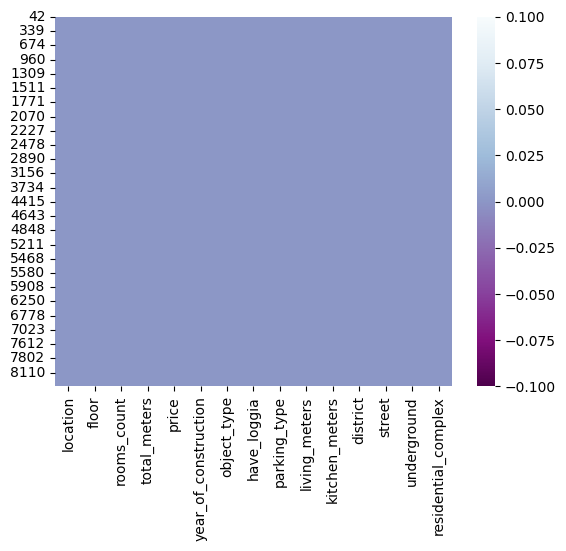

In [509]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')


Красота! Теперь проверяем выбросы

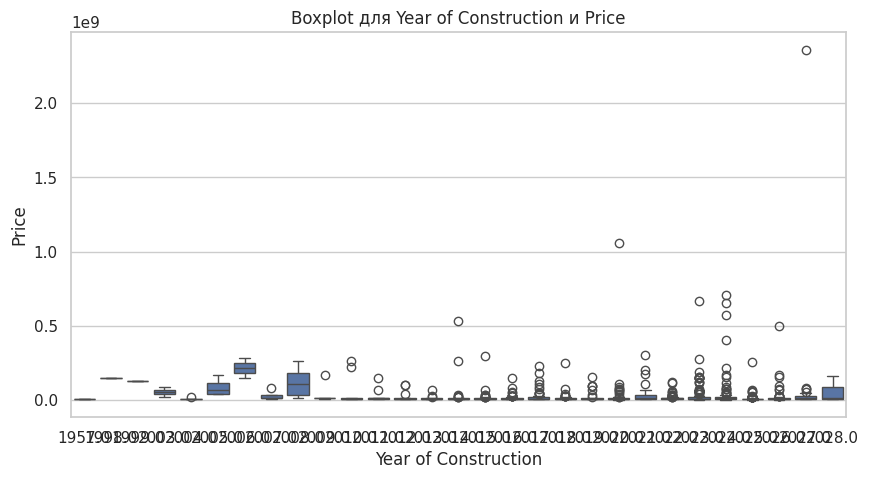

In [518]:
ca['year_of_construction'] = pd.to_numeric(ca['year_of_construction'], errors='coerce')
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')

# Установим стиль графиков
sns.set(style="whitegrid")

# Визуализация выбросов для 'year_of_construction' по оси X и 'price' по оси Y
plt.figure(figsize=(10, 5))
sns.boxplot(x='year_of_construction', y='price', data=ca)
plt.title('Boxplot для Year of Construction и Price')
plt.xlabel('Year of Construction')
plt.ylabel('Price')
plt.show()

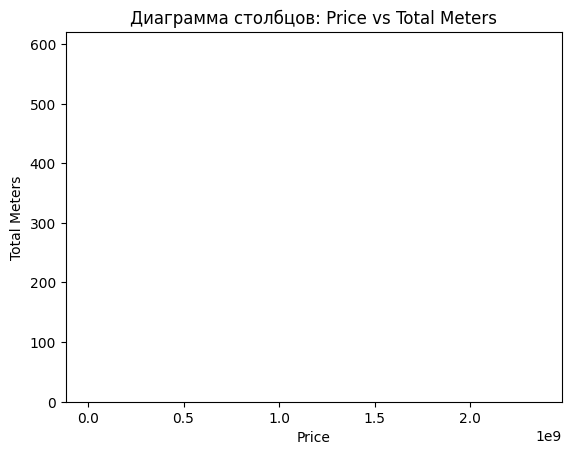

In [510]:
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')


ca = ca.dropna(subset=['total_meters', 'price'])


plt.bar(ca['price'], ca['total_meters'])


plt.title('Диаграмма столбцов: Price vs Total Meters')
plt.xlabel('Price')
plt.ylabel('Total Meters')


plt.show()

#диаграммы отказываются работать, какой бы датафрейм не использовался

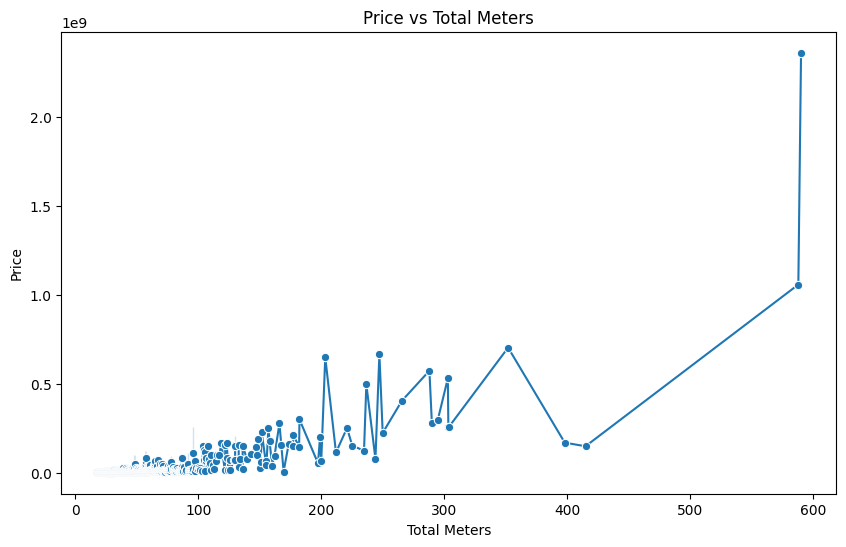

In [511]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ca, x='total_meters', y='price', marker='o')


plt.title('Price vs Total Meters')
plt.xlabel('Total Meters')
plt.ylabel('Price')

plt.show()

#великая чернобыльская аномалия, не дающая этому коду появиться в виде диаграммы

In [512]:
ca['price'] = pd.to_numeric(ca['price'], errors='coerce')
ca['total_meters'] = pd.to_numeric(ca['total_meters'], errors='coerce')
ca['price_for_metre'] = ca['price'] / ca['total_meters'].replace(0, pd.NA)

ca.head(12)

#наконец-то найденная цена за метр

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex,price_for_metre
42,Серпухов,2,2,38.4,6700000.0,2013,Вторичка,2 лоджии,Наземная,17.0,11.0,Серпухов,Ворошилова,Нет,по ул. Ворошилова,174479.166667
63,Дубна,5,1,50.0,9550000.0,2019,Вторичка,1 балкон,Наземная,25.0,10.0,Дубна,Программистов,Нет,на ул. Программистов,191000.000000
78,Дубна,7,2,75.4,10103600.0,2025,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Дубна,Нет,Феникс,134000.000000
81,Дубна,2,2,69.3,9979200.0,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко,144000.000000
84,Дубна,1,2,75.1,10664200.0,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко,142000.000000
87,Дубна,1,2,67.7,9613400.0,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко,142000.000000
89,Дубна,9,2,69.5,10147000.0,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко,146000.000000
92,Дубна,1,3,86.8,10850000.0,2024,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Программистов,Нет,по ул. Макаренко,125000.000000
95,Дубна,2,3,94.0,11797000.0,2025,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Дубна,Нет,Феникс,125500.000000
98,Дубна,9,3,121.5,15248250.0,2025,Новостройка,Нет,Нет,-1.0,-1.0,Дубна,Дубна,Нет,Феникс,125500.000000


In [513]:
min_max_values = {
    'year_of_construction': (1952, 2025),  
    'rooms_count': (1, 5)   
}


cleaned_ca = pd.DataFrame()


for column in ca.columns:
    if column in min_max_values:
        
        ca[column] = pd.to_numeric(ca[column], errors='coerce')
        
        min_value, max_value = min_max_values[column]
        
       
        filtered_column = ca[column][(ca[column] >= min_value) & (ca[column] <= max_value)]
        
        
        cleaned_ca[column] = filtered_column.reset_index(drop=True)
        #даём мин. и макс. лимиты для определённых колонок

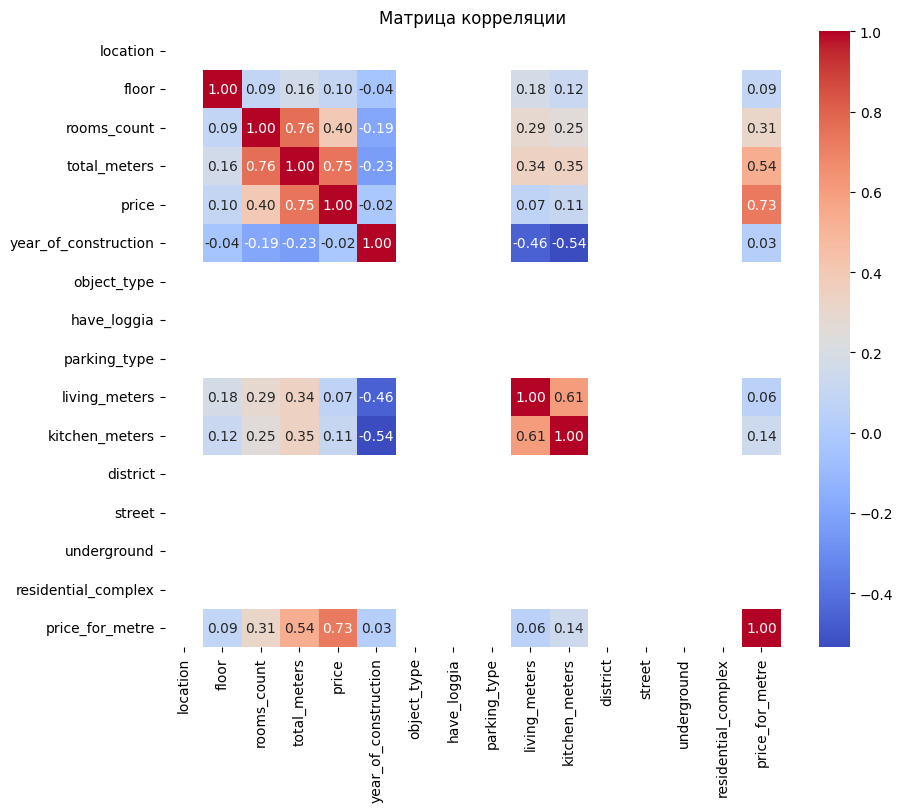

In [514]:
ca = ca.apply(pd.to_numeric, errors='coerce')


correlation_matrix = ca.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)


plt.title('Матрица корреляции')


plt.show()